In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plot
import csv
plot.rc('font',family='serif')
plot.rc('text', usetex=True)
plot.rc('xtick',labelsize=14)
matplotlib.rc('text.latex',preamble='\usepackage{amsmath}, \usepackage{amssymb}, \usepackage{lmodern}, \usepackage[T1]{fontenc}')

In [8]:
# There are 30 NBA Teams
nbTeams=30
# winLoss[i,j] = nb of wins of team i against team j
winLoss = np.zeros((nbTeams,nbTeams))
teams={}

In [9]:
# Reading data: constructing Win/Loss matrix
with open('nba17-18.csv', 'r') as nbaData:
    reader = csv.reader(nbaData, delimiter=',')
    nbTeam=0
    for row in reader:
        team1=row[0]
        if team1 in teams:
            t1 = teams[team1]
        else:
            t1 = nbTeam
            teams[team1]=t1
            nbTeam+=1      
        score1=int(row[1]) # Score of the team1
        team2=row[2]
        if team2 in teams:
            t2 = teams[team2]
        else:
            t2 = nbTeam
            teams[team2]=t2
            nbTeam+=1
        score2=int(row[3]) # Score of the team2

        if score1 > score2:
            winLoss[t1,t2]+=1
        else:
            winLoss[t2,t1]+=1

# Constructing team list
team=[0]*nbTeams
for p,i in teams.iteritems():
    team[i]=p
print team

['Cleveland Cavaliers', 'Boston Celtics', 'Houston Rockets', 'Golden State Warriors', 'Washington Wizards', 'Philadelphia', 'Detroit Pistons', 'Charlotte Hornets', 'Indiana Pacers', 'Brooklyn Nets', 'Orlando Magic', 'Miami Heat', 'Milwaukee Bucks', 'Memphis Grizzlies', 'New Orleans Pelicans', 'Atlanta Hawks', 'Dallas Mavericks', 'Utah Jazz', 'Denver Nuggets', 'San Antonio Spurs', 'Minnesota Timberwolves', 'Portland Trail Blazers', 'Phoenix Suns', 'Sacramento Kings', 'Toronto Raptors', 'Chicago Bulls', 'Oklahoma City Thunder', 'New York Knicks', 'Los Angeles Clippers', 'Los Angeles Lakers']


In [10]:
# Wins and Loss of each team
win = np.sum(winLoss,axis = 1)
loss = np.sum(winLoss,axis = 0)

In [11]:
# Ranking teams according to their percentage of wins
ratio=win/(win+loss)
sort = np.flip(np.argsort(ratio),0)
pr = np.around(100*ratio,decimals=1)
for i in range(nbTeams):
    print team[sort[i]] + ' (' + str(pr[sort[i]]) + '%)'

Houston Rockets (76.8%)
Golden State Warriors (71.8%)
Toronto Raptors (68.5%)
Boston Celtics (65.3%)
Philadelphia (62.0%)
Cleveland Cavaliers (59.6%)
New Orleans Pelicans (58.2%)
Indiana Pacers (57.3%)
Utah Jazz (57.0%)
Portland Trail Blazers (57.0%)
Oklahoma City Thunder (56.8%)
Denver Nuggets (56.1%)
Minnesota Timberwolves (55.2%)
San Antonio Spurs (55.2%)
Milwaukee Bucks (52.8%)
Miami Heat (51.7%)
Los Angeles Clippers (51.2%)
Washington Wizards (51.1%)
Detroit Pistons (47.6%)
Charlotte Hornets (43.9%)
Los Angeles Lakers (42.7%)
New York Knicks (35.4%)
Brooklyn Nets (34.1%)
Sacramento Kings (32.9%)
Chicago Bulls (32.9%)
Orlando Magic (30.5%)
Atlanta Hawks (29.3%)
Dallas Mavericks (29.3%)
Memphis Grizzlies (26.8%)
Phoenix Suns (25.6%)


In [12]:
team= [team[i] for i in sort]
ratio = np.array([ratio[i] for i in sort])

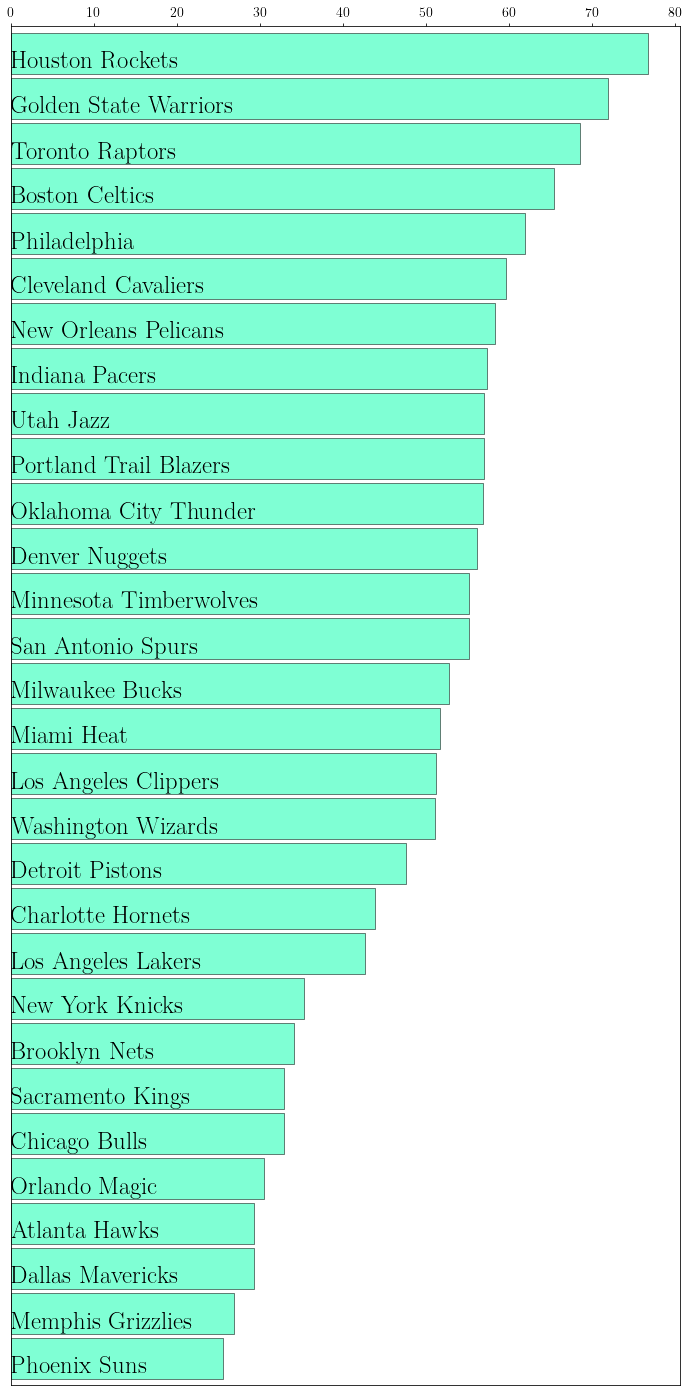

In [13]:
# Plot ranking

y=-np.array(range(nbTeams))
plot.figure(figsize=(12,25),frameon=False)
plot.barh(y,100*ratio,color='aquamarine', height=0.9, edgecolor = 'black',linewidth =0.5)
for i in range(nbTeams):
    lb = r'\Huge '
    lb = lb + team[i]
    plot.text(0.0922,y[i]-0.35,lb)
t=plot.yticks([],[])
l=plot.ylim(-nbTeams+ 0.4,0.6)
ax = plot.gca()
ax.xaxis.tick_top()
plot.savefig("ratio_nba.pdf",bbox_inches='tight',transparent=True)